# Project : Explore Weather Trends
## Analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

The Database Schema at SQL server.

There are three tables in the database:

<ol>
<li>city_list - This contains a list of cities and countries in the database.</li>
<li>city_data - This contains the average temperatures for each city by year (ºC).</li>
<li>global_data - This contains the average global temperatures by year (ºC).</li>
</ol>


*Use SQL code get the dataset we want and export it to CSV file name temp.csv.*

SELECT g.avg_temp as global_avg_temp, c.year,c.city, c.country, c.avg_temp<br>
FROM global_data as g<br>
INNER JOIN city_data as c<br>
ON g.year = c.year<br>
WHERE country ='Malaysia'<br>

## Explore the data

In [1]:
#loading the data & import the package 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
temp = pd.read_csv('temperature.csv')
temp.head(n=5)

,global_avg_temp,year,city,country,avg_temp
0,8.39,1825,Kuala Lumpur,Malaysia,26.46
1,8.36,1826,Kuala Lumpur,Malaysia,NaN
2,8.81,1827,Kuala Lumpur,Malaysia,NaN
3,8.17,1828,Kuala Lumpur,Malaysia,NaN
4,7.94,1829,Kuala Lumpur,Malaysia,NaN


In [2]:
# take a look at our data if there any outliers.
temp.describe()

,global_avg_temp,year,avg_temp
count,189.000000,189.000000,172.000000
mean,8.478042,1919.000000,26.566570
std,0.493669,54.703748,0.478242
min,7.380000,1825.000000,25.590000
25%,8.130000,1872.000000,26.202500
50%,8.440000,1919.000000,26.575000
75%,8.750000,1966.000000,26.922500
max,9.730000,2013.000000,27.890000


In [3]:
#check the data types, all data types is correct.We notice there are 17 missing values in avg_temp.
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   global_avg_temp  189 non-null    float64
 1   year             189 non-null    int64  
 2   city             189 non-null    object 
 3   country          189 non-null    object 
 4   avg_temp         172 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.5+ KB


In [4]:
#There are 17 missing value in our dateset.
temp.isnull().sum()

global_avg_temp     0
year                0
city                0
country             0
avg_temp           17
dtype: int64

In [5]:
#drop the missing data
#double confirm again
temp = temp.dropna()
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 188
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   global_avg_temp  172 non-null    float64
 1   year             172 non-null    int64  
 2   city             172 non-null    object 
 3   country          172 non-null    object 
 4   avg_temp         172 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.1+ KB


In [6]:
temp.head(n=5)

,global_avg_temp,year,city,country,avg_temp
0,8.39,1825,Kuala Lumpur,Malaysia,26.46
14,7.63,1839,Kuala Lumpur,Malaysia,25.74
15,7.80,1840,Kuala Lumpur,Malaysia,25.96
16,7.69,1841,Kuala Lumpur,Malaysia,26.10
17,8.02,1842,Kuala Lumpur,Malaysia,26.18


## Data Preparation 
We will create a 10 years moving average and visualize it on the graph. 

In [7]:
#create 10Y moving average temp for global temp and Malaysia temp
temp['global_10Y_MA'] = temp.iloc[:,0].rolling(window=10).mean()
temp['malaysia_10Y_MA'] = temp.iloc[:,4].rolling(window=10).mean()
temp.head(n=15)

,global_avg_temp,year,city,country,avg_temp,global_10Y_MA,malaysia_10Y_MA
0,8.39,1825,Kuala Lumpur,Malaysia,26.46,NaN,NaN
14,7.63,1839,Kuala Lumpur,Malaysia,25.74,NaN,NaN
15,7.80,1840,Kuala Lumpur,Malaysia,25.96,NaN,NaN
16,7.69,1841,Kuala Lumpur,Malaysia,26.10,NaN,NaN
17,8.02,1842,Kuala Lumpur,Malaysia,26.18,NaN,NaN
18,8.17,1843,Kuala Lumpur,Malaysia,26.25,NaN,NaN
19,7.65,1844,Kuala Lumpur,Malaysia,25.77,NaN,NaN
20,7.85,1845,Kuala Lumpur,Malaysia,25.64,NaN,NaN
21,8.55,1846,Kuala Lumpur,Malaysia,26.44,NaN,NaN
22,8.09,1847,Kuala Lumpur,Malaysia,25.89,7.984,26.043


In [8]:
# calculate how many time Malaysia temperature to global temperature, it's 3.12 times!
ratio = temp['malaysia_10Y_MA']/temp['global_10Y_MA']
ratio.mean()


3.120111049422916

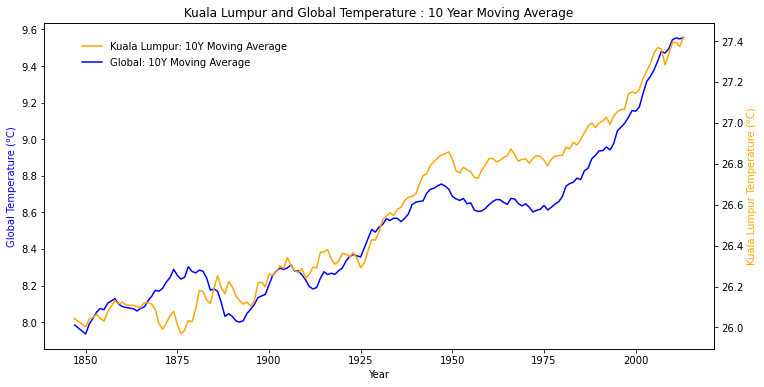

In [9]:
#create a dual axis graph
# create the first axes

fig,ax = plt.subplots(figsize=[12,6]);
ax.plot(temp['year'], temp['global_10Y_MA'], label='Global: 10Y Moving Average', color ='blue')
ax.set_xlabel('Year')
ax.set_ylabel('Global Temperature (°C)',color ='blue')
ax.set_title('Kuala Lumpur and Global Temperature : 10 Year Moving Average')
ax.legend(loc = (.05,.85), frameon = False)

# create the second axes
ax1 = ax.twinx()
ax1.plot(temp['year'], temp['malaysia_10Y_MA'], label='Kuala Lumpur: 10Y Moving Average ', color ='orange')
ax1.set_ylabel('Kuala Lumpur Temperature (°C)',color ='orange')
ax1.legend(loc = (.05, .90), frameon = False);


This is very hard to tell the difference. Let visual the data in the percentage of change in temperature.

In [10]:
#calculate the percentage of temperature change over the total years 
temp['global_temp_Percentage'] = temp['global_10Y_MA']*100/temp['global_10Y_MA'].iloc[9] - 100 
temp['Malaysia_temp_Percentage'] = temp['malaysia_10Y_MA']*100/temp['malaysia_10Y_MA'].iloc[9] - 100
temp.tail(n=5)

,global_avg_temp,year,city,country,avg_temp,global_10Y_MA,malaysia_10Y_MA,global_temp_Percentage,Malaysia_temp_Percentage
184,9.51,2009,Kuala Lumpur,Malaysia,27.47,9.493,27.336,18.900301,4.964866
185,9.70,2010,Kuala Lumpur,Malaysia,27.69,9.543,27.391,19.526553,5.176055
186,9.52,2011,Kuala Lumpur,Malaysia,27.27,9.554,27.394,19.664329,5.187574
187,9.51,2012,Kuala Lumpur,Malaysia,27.36,9.548,27.373,19.589178,5.106939
188,9.61,2013,Kuala Lumpur,Malaysia,27.80,9.556,27.417,19.689379,5.275890


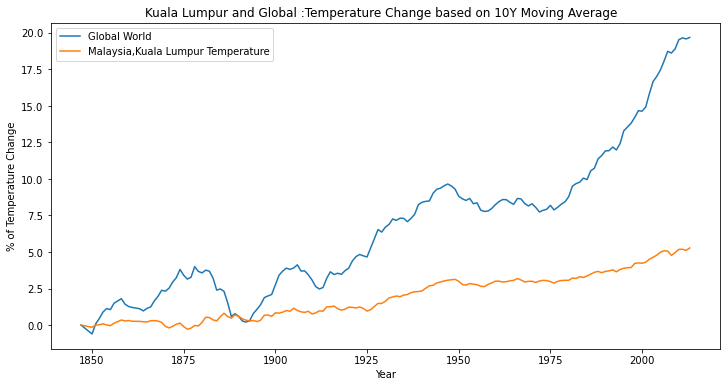

In [11]:
#create a line graph to visual the results
plt.figure(figsize=[12,6]) 
plt.plot(temp['year'], temp['global_temp_Percentage'],label='Global World')
plt.plot(temp['year'], temp['Malaysia_temp_Percentage'],label='Malaysia,Kuala Lumpur Temperature')
plt.xlabel('Year')
plt.ylabel('% of Temperature Change')
plt.title('Kuala Lumpur and Global :Temperature Change based on 10Y Moving Average  ')
plt.legend();

Conclusion: 

1. The temperature of Kuala Lumpur, Malaysia increasing by 5.37% over those years.
2. The global temperature increases sharply over the years, which is 19.69%.
3. The 10 years average temperature of Kuala Lumpur, Malaysia is 3.12 times higher than 10 years average global temperature.
4. The global temperature will continue to increase due to global warming.

References:<br>
    1. https://www.datacamp.com/community/tutorials/moving-averages-in-pandas<br>